In [1]:

#Importing relevant libraries
import zipfile
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pydot
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from PIL import Image

#Extractiong the dataset zip file
with zipfile.ZipFile('./trafficsigns_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

# Data handling

In [2]:
#Creating a pandas dataframe and a csv file from the given dataset

#data = pd.read_csv('./CIFAR_Data.csv')
dir_list = os.listdir('./trafficsigns_dataset')
dir_list.remove('.DS_Store')
dir_list.remove('Readme.txt')

print(dir_list)
path='./trafficsigns_dataset/'
arr=[]

counter1=1
counter2=1


for i in dir_list:
    dir_listtemp=os.listdir(path+i)
    if '.DS_Store'in dir_listtemp:
        dir_listtemp.remove('.DS_Store')

    for j in dir_listtemp:
        dir_listtemp2=os.listdir(path+i+'/'+j)

        for k in dir_listtemp2:
            arr.append((path+i+'/'+j+'/'+k, counter1, counter2))
        counter2+=1
    counter1+=1
    #counter2+=1

data = np.array(arr)
                #dtype=[("a", "str"), ("b", "i4"), ("c", "i4")])
df = pd.DataFrame(data, columns=['Image', 'Form', 'Type'])              #dataframe 
df['Form'] = df['Form'].astype(int)
df['Type'] = df['Type'].astype(int)

df.to_csv('trafficsigns_data.csv',index=True, index_label='ID' )        #csv file
            
 




['diamond', 'hex', 'round', 'square', 'triangle']


In [3]:
#Datasplit to train and validation

train, val = train_test_split(df, test_size=0.30, random_state=48)
print(df.shape)
print(train.shape)
print(val.shape)

(3701, 3)
(2590, 3)
(1111, 3)


# EDA

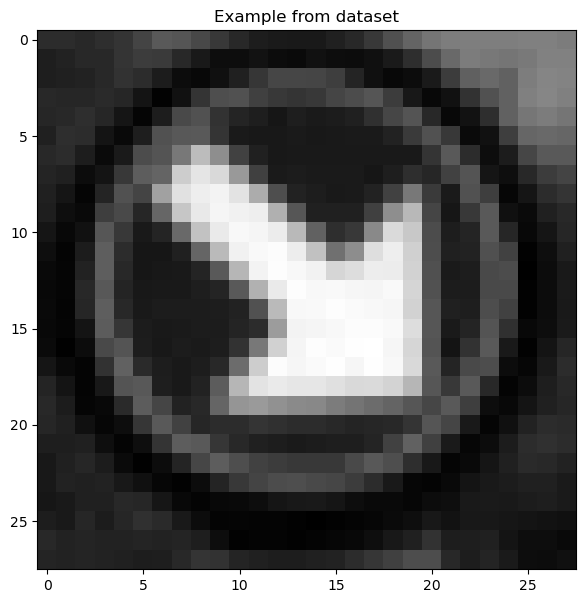

How the computer sees the picture:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,34,47,40,16,16,18,19,20,25,28,33,45,54,195,210,146,102,105,107,115,110,112,108,111,122,138,146,159
1,48,45,47,77,86,94,100,114,146,142,130,129,132,146,169,171,150,154,131,118,126,136,136,138,142,141,136,134
2,59,46,62,109,116,117,123,253,110,100,146,253,225,155,125,128,150,183,214,141,117,118,120,111,104,103,82,80
3,63,45,76,132,126,134,252,106,205,232,100,66,63,66,66,66,68,66,69,127,158,86,84,90,93,91,87,86
4,58,46,76,123,114,247,102,255,111,63,64,65,64,65,65,65,67,65,65,66,60,161,111,91,91,96,86,83
5,50,58,58,93,237,104,247,66,64,65,64,64,63,66,66,66,66,66,66,65,65,68,148,118,93,83,80,90
6,72,75,86,217,86,250,63,64,64,65,65,64,63,64,66,65,66,66,65,66,64,68,64,137,80,75,80,71
7,66,84,203,73,252,62,61,65,64,63,65,66,65,65,66,66,67,65,67,66,65,67,64,69,140,80,70,68
8,94,214,71,171,124,65,67,65,66,68,66,66,67,67,67,68,67,67,67,67,66,68,68,67,131,74,73,79
9,137,88,63,242,64,68,69,65,67,68,68,68,67,68,68,69,67,68,68,69,69,69,67,68,68,118,70,63


In [105]:
#Plotting an example photo
plt.figure(figsize=[7, 7])
plt.title('Example from dataset')
plt.imshow(Image.open(df['Image'][2000]),cmap='grey')
plt.savefig(os.path.join("Figures report", "ExampleFromDataset.PNG"))
plt.show()


#What the computer "sees",  pixel values indicate color (0=white to 255=black)
print('How the computer sees the picture:')
with pd.option_context('display.max_rows', 100, 'display.max_columns', 500):
    display(pd.DataFrame(np.asarray(Image.open(df['Image'][750]))))

In [5]:
train.describe()

,Form,Type
count,2590.000000,2590.000000
mean,3.523552,9.352510
std,1.112113,5.071873
min,1.000000,1.000000
25%,3.000000,5.000000
50%,3.000000,9.000000
75%,4.000000,14.000000
max,5.000000,16.000000


[202, 31, 1207, 509, 641]
[202, 31, 198, 88, 270, 151, 75, 208, 133, 84, 152, 72, 87, 198, 164, 477]


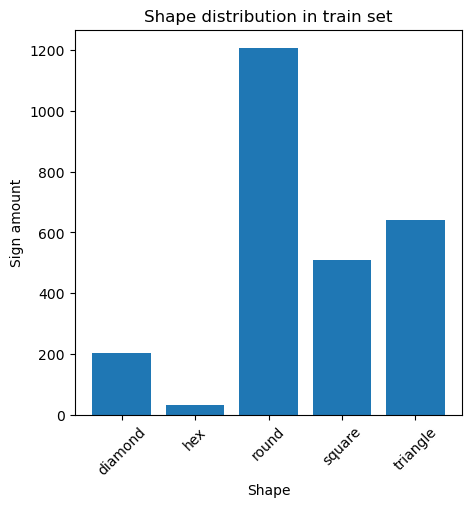

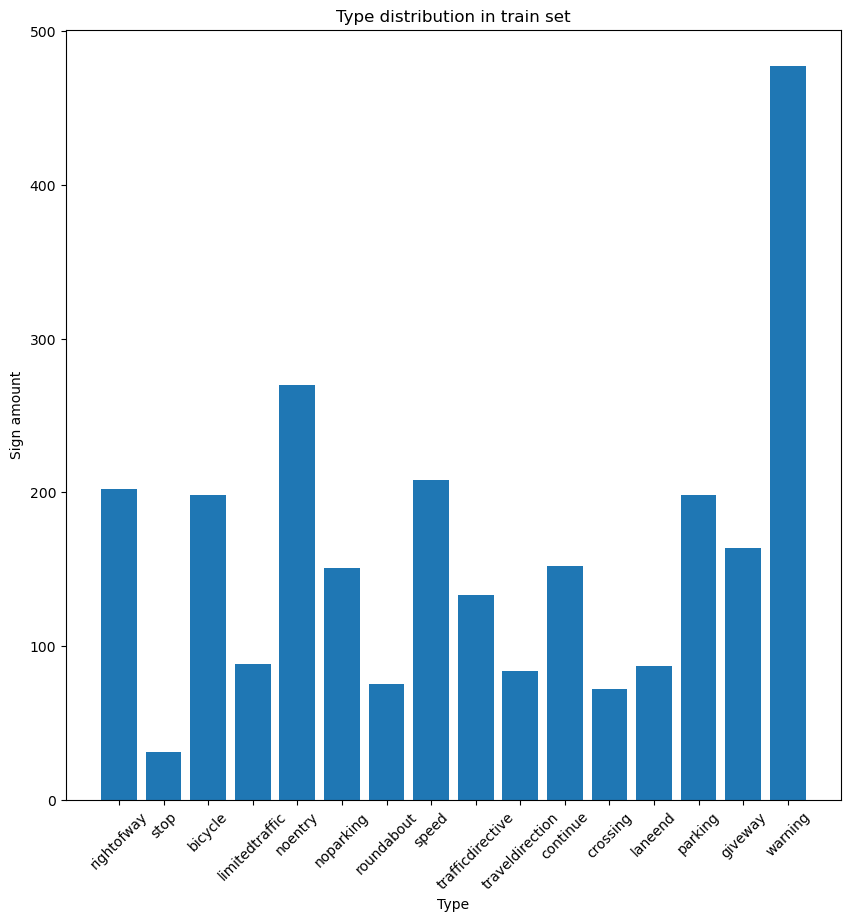

In [70]:
arrForm=[]
npType=train['Form'].to_numpy()
for i in range(5):
    a=np.count_nonzero(npType==i+1)
    arrForm.append(a)
print(arrForm)

arrTypeTrain=[]
npType=train['Type'].to_numpy()
for i in range(16):
    a=np.count_nonzero(npType==i+1)
    arrTypeTrain.append(a)
print(arrTypeTrain)
Forms=['diamond', 'hex', 'round', 'square', 'triangle']
Types=['rightofway', 'stop', 'bicycle', 'limitedtraffic', 'noentry', 
              'noparking', 'roundabout', 'speed', 'trafficdirective', 
              'traveldirection', 'continue', 'crossing', 'laneend', 'parking', 
              'giveway', 'warning']

plt.figure(figsize=(5,5))
plt.title('Shape distribution in train set')
plt.xlabel('Shape')
plt.ylabel('Sign amount')
plt.bar(Forms, arrForm)
plt.xticks(rotation=45)
#plt.savefig(os.path.join("Figures report", "ShapeDistributionTrain.PNG"))


plt.figure(figsize=(10,10))
plt.title('Type distribution in train set')
plt.xlabel('Type')
plt.ylabel('Sign amount')
plt.bar(Types, arrTypeTrain)
plt.xticks(rotation=45)
#plt.savefig(os.path.join("Figures report", "TypeDistributionTrain.PNG"))


[80, 12, 553, 180, 286]
[16 15  5 ... 14 16  6]
6
[80, 12, 87, 37, 105, 91, 23, 108, 62, 40, 48, 23, 31, 78, 67, 219]


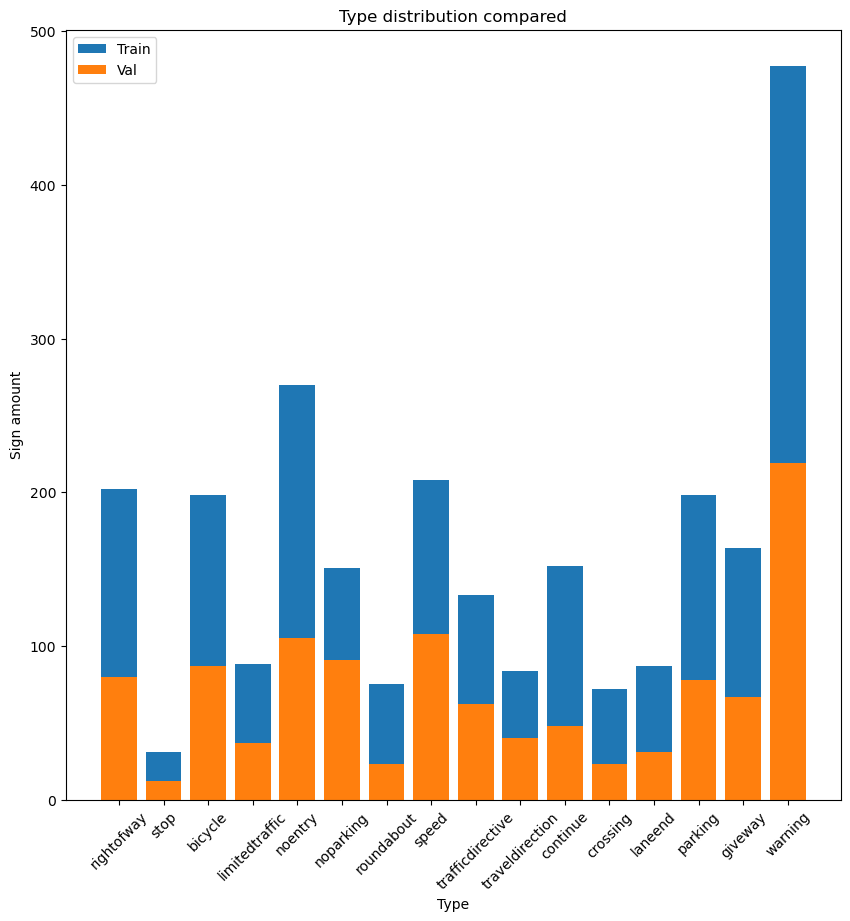

In [75]:
arrFormVal=[]
npType=val['Form'].to_numpy()
for i in range(5):
    a=np.count_nonzero(npType==i+1)
    arrFormVal.append(a)
print(arrFormVal)

arrTypeVal=[]
npType=val['Type'].to_numpy()
print(npType)
print(npType[-1])
for i in range(16):
    a=np.count_nonzero(npType==i+1)
    arrTypeVal.append(a)
print(arrTypeVal)

'''
plt.figure(figsize=(5,5))
plt.title('Shape distribution in validation set')
plt.xlabel('Shape')
plt.ylabel('Sign amount')
plt.bar(Forms, arrFormVal)
plt.xticks(rotation=45)

plt.figure(figsize=(10,10))
plt.title('Type distribution in validation set')
plt.xlabel('Type')
plt.ylabel('Sign amount')
plt.bar(Types, arrTypeVal)
plt.xticks(rotation=45)
'''

plt.figure(figsize=(10,10))
#plt.bar(Forms, arrForm,label='Train')
plt.bar(Types, arrTypeTrain, label = 'Train')
#plt.bar(Forms, arrFormVal,label ='Val')
plt.bar(Types, arrTypeVal, label ='Val')

plt.title('Type distribution compared')
plt.xlabel('Type')
plt.legend()
plt.ylabel('Sign amount')
plt.xticks(rotation=45)
plt.savefig(os.path.join("Figures report", "TypeDistributionCompared.PNG"))


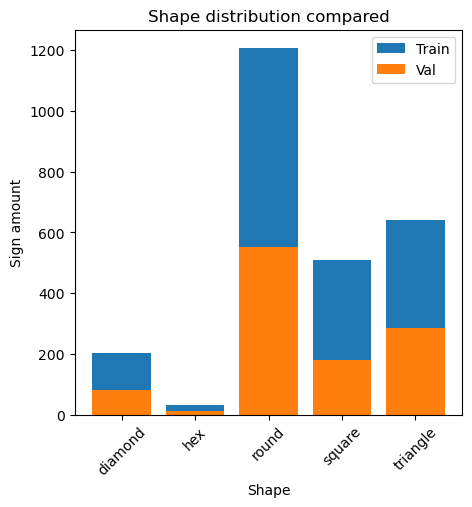

In [74]:
#PLotting train vs validation distribution for shapes
plt.figure(figsize=(5,5))

plt.bar(Forms, arrForm,label='Train')
plt.bar(Forms, arrFormVal,label ='Val')
plt.title('Shape distribution compared')
plt.xlabel('Shape')
plt.legend()
plt.ylabel('Sign amount')
plt.xticks(rotation=45)
plt.savefig(os.path.join("Figures report", "ShapeDistributionCompared.PNG"))


(202,)
(1207,)
[198, 88, 270, 151, 75, 208, 133, 84]
(509,)
[152, 72, 87, 198]
(641,)
[164, 477]


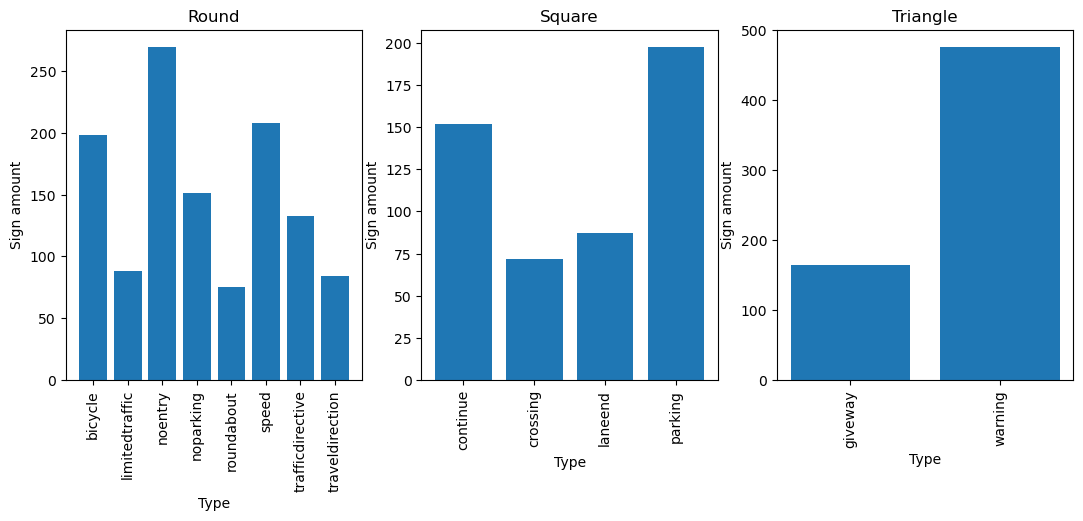

In [82]:
#PLotting the distributed types for each shape
plt.figure(figsize=(13,10))

a = train[train["Form"]==1]

arrType=[]
npType=a['Type'].to_numpy()
print(npType.shape)
for i in range(1,2):
    b=np.count_nonzero(npType==i)
    arrType.append(b)
'''
print(arrType)
plt.subplot(2,3,1)
plt.bar(Types[0:1], arrType, width=0.05)
#plt.xticks(rotation=45)
plt.title('Diamond')
plt.xlabel('Type')
plt.ylabel('Sign amount')

a = train[train["Form"]==2]

arrType=[]
npType=a['Type'].to_numpy()
print(npType.shape)
for i in range(2,3):
    b=np.count_nonzero(npType==i)
    arrType.append(b)

print(arrType)
plt.subplot(2,3,2)
plt.bar(Types[1:2], arrType)
plt.xticks(rotation=0)
plt.title('Hex')
plt.xlabel('Type')
plt.ylabel('Sign amount')
'''


a = train[train["Form"]==3]

arrType=[]
npType=a['Type'].to_numpy()
print(npType.shape)
for i in range(3,11):
    b=np.count_nonzero(npType==i)
    arrType.append(b)

print(arrType)
plt.subplot(2,3,1)
plt.bar(Types[2:10], arrType)
plt.xticks(rotation=90)
plt.title('Round')
plt.xlabel('Type')
plt.ylabel('Sign amount')


a = train[train["Form"]==4]

arrType=[]
npType=a['Type'].to_numpy()
print(npType.shape)
for i in range(11,15):
    b=np.count_nonzero(npType==i)
    arrType.append(b)

print(arrType)
plt.subplot(2,3,2)
plt.bar(Types[10:14], arrType)
plt.xticks(rotation=90)
plt.title('Square')
plt.xlabel('Type')
plt.ylabel('Sign amount')


a = train[train["Form"]==5]

arrType=[]
npType=a['Type'].to_numpy()
print(npType.shape)
for i in range(15,17):
    b=np.count_nonzero(npType==i)
    arrType.append(b)

print(arrType)
plt.subplot(2,3,3)
plt.bar(Types[14:], arrType)
plt.xticks(rotation=90)
plt.title('Triangle')
plt.xlabel('Type')
plt.ylabel('Sign amount')
plt.savefig(os.path.join("Figures report", "TypesInShapes.PNG"))


# Model developement
 - In multiclass classification, a natural measure of performance is the accurace, which is the chosen performence metric for these models
 - Due to label imbalance (EDA), the accuracy may not be as valuable on its own. Therefore, the F1 score will be used together with the accuracy(Kilde: https://www.kaggle.com/code/nkitgupta/evaluation-metrics-for-multi-class-classification). 
 - We set our goal to an accuracy of 80%
 - For a traditional NN, an accuracy of 50% is more realistic (Kilde: lab 6)
        

### Performance metric 

In [85]:
#Code from lab exercise 6 plotting the accuracy and loss of the classification model
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy', title1='title1', title2='title2'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.title(title1)
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.title(title2)
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig(os.path.join("Figures report", title1 + title2 + ".PNG"))

    plt.show()

### Baseline model 1

In [14]:
#Preparing the dataset for base model 1(input image, output shape (form))
train_1 = train.drop(['Type'], axis=1)
val_1 = val.drop(['Type'], axis=1)

train_1.head(4)

,Image,Form
1319,./trafficsigns_dataset/round/noparking/01737_0...,3
3269,./trafficsigns_dataset/triangle/warning/00573_...,5
2259,./trafficsigns_dataset/square/continue/01669_0...,4
2886,./trafficsigns_dataset/triangle/giveway/01001_...,5


In [15]:
#Building the model by selecting number of layers, input dimension and output classes
INPUT_DIMENSION = (28,28,3)
HIDDEN_LAYER_DIMENSION = 256
OUTPUT_CLASSES = 5


base_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIMENSION),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIMENSION, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

base_model.summary()

C:\Users\anyone\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 2352)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         602,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 603,653 (2.30 MB)

 Trainable params: 603,653 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:

#tf.keras.utils.plot_model(base_model, show_shapes=True)

In [17]:
base_model.compile(optimizer='SGD', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=['f1_score','categorical_accuracy'])

In [18]:

#Dataframe labels to string:
train_1['Form'] = train_1['Form'].astype('str')
val_1['Form'] = val_1['Form'].astype('str')

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#Preparing model input data by creating data baches
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_1,
        directory='./',
        x_col="Image",
        y_col="Form",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_1,
        directory='./',
        x_col="Image",
        y_col="Form",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

#print(vars(validation_generator))

class_weights={0:5.98, 1:38.97,2:1,3:2.4,4:1.87}
#38.97

Found 2590 validated image filenames belonging to 5 classes.
Found 1110 validated image filenames belonging to 5 classes.


C:\Users\anyone\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  warnings.warn(


In [20]:
#base model 1 training
model_history = base_model.fit(train_generator, validation_data=validation_generator, epochs=50, verbose=0, class_weight=None)

C:\Users\anyone\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Train: 
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - categorical_accuracy: 0.9357 - f1_score: 0.7583 - loss: 0.2706
Validation: 
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - categorical_accuracy: 0.9493 - f1_score: 0.7600 - loss: 0.2783


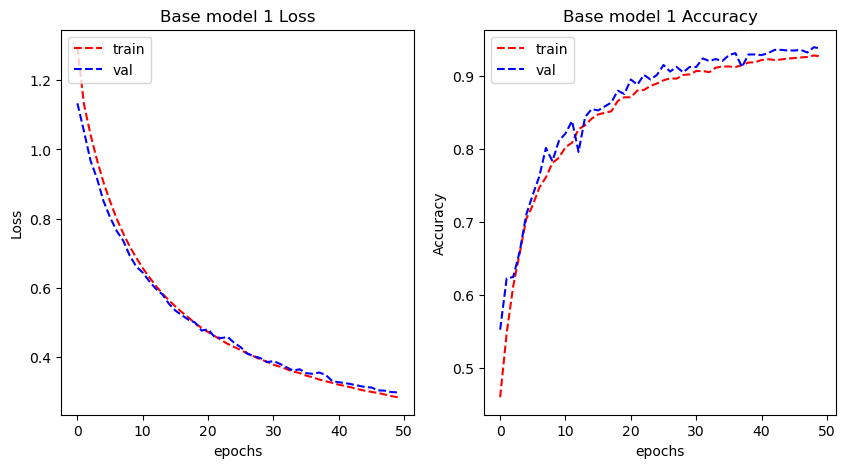

In [86]:
#Evaluating base model 1 accuracy and f1 score
print('Train: ')
base_model.evaluate(train_generator)
print('Validation: ')
base_model.evaluate(validation_generator)

plot_learning_curve(model_history.history['loss'], model_history.history['val_loss'], 
                    model_history.history['categorical_accuracy'], model_history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy', title1='Base model 1 Loss', title2='Base model 1 Accuracy')


### Incremental changes (Improved model 1)

In [22]:
#Buliding theimrpoved model 1 by adding layers and activation function.

INPUT_DIMENSION = (28,28,3)
HIDDEN_LAYER_DIMENSION = 256
OUTPUT_CLASSES = 5


imp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIMENSION),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIMENSION, activation='relu'),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIMENSION, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
    
])

imp_model.summary()

C:\Users\anyone\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 2352)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         602,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,445 (2.55 MB)

 Trainable params: 669,445 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
imp_model.compile(optimizer='SGD', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=['categorical_accuracy','f1_score'])

In [24]:
#Training the improved model 1
imp_model_history = imp_model.fit(train_generator, validation_data=validation_generator, epochs=50, verbose=0, class_weight=class_weights)

Train:
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - categorical_accuracy: 1.0000 - f1_score: 0.9951 - loss: 0.0111
Evaluation:
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - categorical_accuracy: 0.9809 - f1_score: 0.9809 - loss: 0.0636


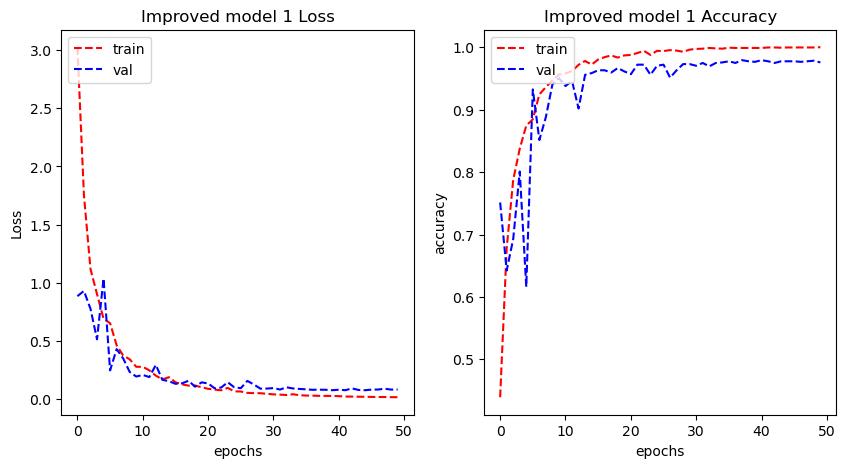

In [96]:
#Evaluating the improved model 1
print('Train:')
imp_model.evaluate(train_generator)
print('Evaluation:')
imp_model.evaluate(validation_generator)

plot_learning_curve(imp_model_history.history['loss'], imp_model_history.history['val_loss'], 
                    imp_model_history.history['categorical_accuracy'], imp_model_history.history['val_categorical_accuracy'], 
                    metric_name='accuracy',title1='Improved model 1 Loss', title2='Improved model 1 Accuracy')

### Baseline model 2

In [27]:
#Preparing the dataset for base model 2: input: image, output: type 
train_2 = train.copy()
val_2 = val.copy()

train_2.head(4)

,Image,Form,Type
1319,./trafficsigns_dataset/round/noparking/01737_0...,3,6
3269,./trafficsigns_dataset/triangle/warning/00573_...,5,16
2259,./trafficsigns_dataset/square/continue/01669_0...,4,11
2886,./trafficsigns_dataset/triangle/giveway/01001_...,5,15


In [28]:
#Building the base model 2 structure (same as base model 1)
INPUT_DIMENSION = (28,28,3)
HIDDEN_LAYER_DIMENSION = 256
OUTPUT_CLASSES = 16


base_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIMENSION),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIMENSION, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

base_model_2.summary()

C:\Users\anyone\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 2352)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         602,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │           4,112 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 606,480 (2.31 MB)

 Trainable params: 606,480 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
#tf.keras.utils.plot_model(base_model_2, show_shapes=True)

In [30]:
base_model_2.compile(optimizer='SGD', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=['f1_score','categorical_accuracy'])

In [31]:
#Dataframe labels to string to fit data generation:
train_2['Form'] = train_2['Form'].astype('str')
val_2['Form'] = val_2['Form'].astype('str')

train_2['Type'] = train_2['Type'].astype('str')
val_2['Type'] = val_2['Type'].astype('str')

print(type(train_2['Type'][0]))

<class 'str'>


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Preparing model input data by creating data baches
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32


train_generator_2 = train_datagen.flow_from_dataframe(
        dataframe=train_2,
        directory='./',
        x_col="Image",
        y_col="Type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator_2 = val_datagen.flow_from_dataframe(
        dataframe=val_2,
        directory='./',
        x_col="Image",
        y_col="Type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

#print(dir(validation_generator))
#print(vars(validation_generator))



Found 2590 validated image filenames belonging to 16 classes.
Found 1110 validated image filenames belonging to 16 classes.


C:\Users\anyone\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  warnings.warn(


In [33]:
#Training base mode 2 
base_model_2_history = base_model_2.fit(train_generator_2, validation_data=validation_generator_2, epochs=50, verbose=0)

C:\Users\anyone\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - categorical_accuracy: 0.8922 - f1_score: 0.8383 - loss: 0.5541
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - categorical_accuracy: 0.8775 - f1_score: 0.7770 - loss: 0.5902


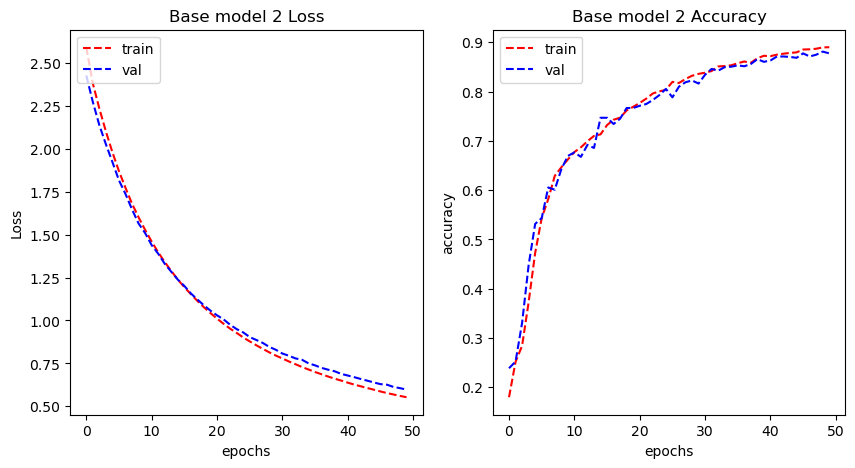

In [88]:
#Evaluating base model 2
base_model_2.evaluate(train_generator_2)
base_model_2.evaluate(validation_generator_2)

plot_learning_curve(base_model_2_history.history['loss'], base_model_2_history.history['val_loss'], 
                    base_model_2_history.history['categorical_accuracy'], base_model_2_history.history['val_categorical_accuracy'], 
                    metric_name='accuracy', title1='Base model 2 Loss', title2='Base model 2 Accuracy')

### Improved model 2

In [35]:
#Building improved model 2 the same way as the improved model 1
INPUT_DIMENSION = (28,28,3)
HIDDEN_LAYER_DIMENSION = 256
OUTPUT_CLASSES = 16


imp_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIMENSION),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIMENSION, activation='relu'),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIMENSION, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
    
])
classs= np.divide(477, arrTypeTrain)
print(classs)
class_weights_2 = {0:2.36,1:5.68,2:3.22,3:6.72, 4:5.68, 5:2.37,6:2.84, 7:1, 8:15.39, 9:2.41,10:5.42,11:1.77,12:3.14,13:6.36,14:2.29,15:3.59}

imp_model_2.summary()

[ 2.36138614 15.38709677  2.40909091  5.42045455  1.76666667  3.1589404
  6.36        2.29326923  3.58646617  5.67857143  3.13815789  6.625
  5.48275862  2.40909091  2.90853659  1.        ]


C:\Users\anyone\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 2352)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         602,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │           4,112 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 672,272 (2.56 MB)

 Trainable params: 672,272 (2.56 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
imp_model_2.compile(optimizer='SGD', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=['categorical_accuracy','f1_score'])


In [37]:
#Training improved model 2
imp_model_2_history = imp_model_2.fit(train_generator_2, validation_data=validation_generator_2, epochs=50, verbose=0, class_weight=class_weights_2)

81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - categorical_accuracy: 1.0000 - f1_score: 0.9970 - loss: 0.0112
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - categorical_accuracy: 0.9532 - f1_score: 0.9333 - loss: 0.1755


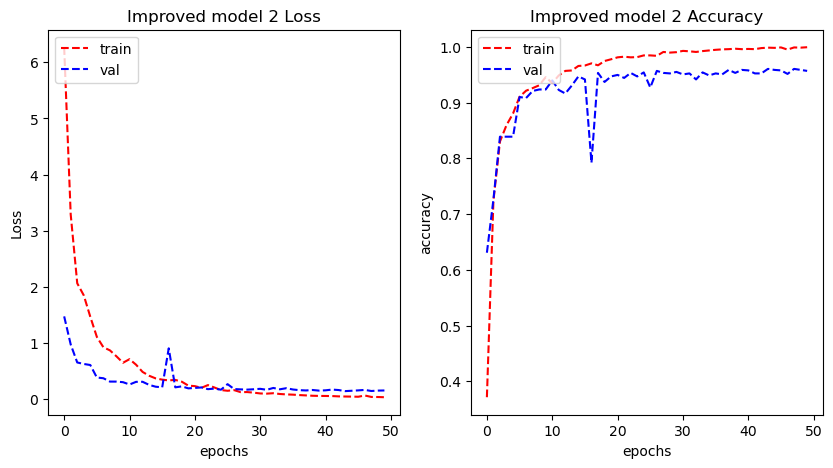

In [89]:
#Evaluating improved model 2
imp_model_2.evaluate(train_generator_2)
imp_model_2.evaluate(validation_generator_2)

plot_learning_curve(imp_model_2_history.history['loss'], imp_model_2_history.history['val_loss'], 
                    imp_model_2_history.history['categorical_accuracy'], imp_model_2_history.history['val_categorical_accuracy'], 
                    metric_name='accuracy', title1='Improved model 2 Loss', title2='Improved model 2 Accuracy')

## Testing on collected test set

In [118]:
#data = pd.read_csv('./CIFAR_Data.csv')

#Same code used for creating the test set dataframe that created the traing set

dir_list2 = os.listdir('./test_set_actualactualactual')

print(dir_list2)
path2='./test_set_actualactualactual/'
temparr=[]

counter1=1
counter2=1


for i in dir_list2:
    dir_listtemp=os.listdir(path2+i)
    if '.DS_Store'in dir_listtemp:
        dir_listtemp.remove('.DS_Store')

    for j in dir_listtemp:
        dir_listtemp2=os.listdir(path2+i+'/'+j)

        for k in dir_listtemp2:
            temparr.append((path2+i+'/'+j+'/'+k, counter1, counter2))
        counter2+=1
    counter1+=1
    #counter2+=1

testdata = np.array(temparr)
                #dtype=[("a", "str"), ("b", "i4"), ("c", "i4")])
dfTest = pd.DataFrame(testdata, columns=['Image', 'Form', 'Type'])       #Dataframe

dfTest.to_csv('trafficsigns_data.csv',index=True, index_label='ID' )     #csv format
            

['Diamond', 'Hex', 'Round', 'Square', 'Triangle']


In [119]:
#Preparing the test set for testing of both ofthe improved models

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

test_generator_1 = train_datagen.flow_from_dataframe(
        dataframe=dfTest,
        directory='./',
        x_col="Image",
        y_col="Form",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')


test_generator_2 = train_datagen.flow_from_dataframe(
        dataframe=dfTest,
        directory='./',
        x_col="Image",
        y_col="Type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')


Found 706 validated image filenames belonging to 5 classes.
Found 706 validated image filenames belonging to 16 classes.


In [120]:
#testing the imrpovedmodel 1 (Shape)
imp_model.evaluate(test_generator_1)


 5/23 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.4942 - f1_score: 0.4284 - loss: 2.2757

C:\Users\anyone\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - categorical_accuracy: 0.5428 - f1_score: 0.4756 - loss: 2.0045


[1.923805832862854,
 0.5439093708992004,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([0.368421  , 0.5625    , 0.67787105, 0.29347822, 0.46491227],
       dtype=float32)>]

In [121]:
#testing the imrpovedmodel 2 (Type)

imp_model_2.evaluate(test_generator_2)



23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - categorical_accuracy: 0.3825 - f1_score: 0.3290 - loss: 3.9154


[3.9001104831695557,
 0.39235126972198486,
 <tf.Tensor: shape=(16,), dtype=float32, numpy=
 array([0.43661967, 0.        , 0.        , 0.        , 0.47619042,
        0.56637156, 0.6138613 , 0.47826082, 0.48101264, 0.42391297,
        0.28070173, 0.37499994, 0.06956521, 0.64      , 0.24390242,
        0.625     ], dtype=float32)>]

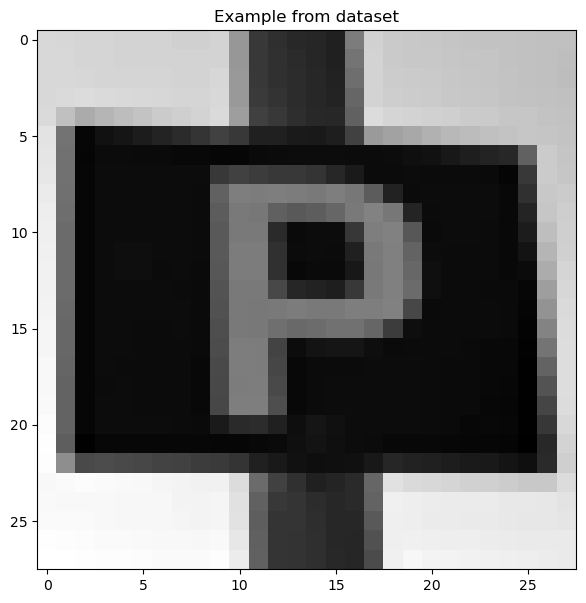

In [131]:
#Plotting an example photo
plt.figure(figsize=[7, 7])
plt.title('Example from dataset')
plt.imshow(Image.open(dfTest['Image'][575]),cmap='grey')
plt.savefig(os.path.join("Figures report", "ExampleFromDatasetTest.PNG"))
plt.show()